# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) is a process of analyzing a dataset to see the main characteristics of the data. EDA is basic processing that can influence a data scientist's decisions in processing data at the next stage. This process often involves two things, including *descriptive statistics* and data *visualization*.

## Dataset Avocado
The table below shows 2018 weekly retail scan data for Nationwide retail volume (units) and prices. Retail scan data comes directly from retailers based on actual retail sales of Hass type avocados. Starting in 2013, the table below reflects a multi-outlet retail data set. AveragePrice in the table reflects the cost per unit (per avocado). The Product Search Code (PLU) in the table is for Hass avocados only. Other avocado varieties (e.g. green skin) are not included in this table.

* `Date`: the date of the observation
* `AveragePrice`: the average price of a single avocado
* `Total Volume`: total weight of avocados sold
* `4046`: total weight of avocados with PLU 4046 sold
* `4225`: total weight of avocados with PLU 4225 sold
* `4770`: total weight of avocados with PLU 4770 sold
* `Total Bags`: total weight of sold avocados put in bags (excluding those with PLUs)
* `Small Bags`: total weight of sold avocados put in small bags
* `Large Bags`: total weight of sold avocados put in large bags
* `XLarge Bags`: total weight of sold avocados put in extra large bags
* `type`: conventional or organic
* `year`: the year
* `region`: the city or region of the observation


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Import dataset with index in the first column
avocado_df = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/avocado.csv', index_col=0)

In [ ]:
total_rows, total_attributes = avocado_df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

avocado_df.head()

In [ ]:
# Columns on dataframe
avocado_df.info()

You can see at a glance the type and number of non-nulls in each column. From this information, we know that there are no columns that have null for the avocado dataset (because all columns have the same amount of data).

In [ ]:
# Displays statistics for each numeric attribute
avocado_df.describe()

In [ ]:
# Displays statistics for each non-numeric or categorical attribute
avocado_df.describe(include=np.object)

## Descriptive Statistics

There are many types of measures that can be applied for *descriptive statistics*.

Considering the material from StatProb, there is
1. *Central tendency* (mean, median, mode)
2. *Dispersion* or *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency is often used to see the distribution of data.**
In general, `mean` is more suitable for normal distributions (which look symmetrical in the middle), while median is better for distributions that are *skewed* (one-sided). Of course, this does not apply to categorical data which can only use `mode`.

Sometimes central tendency alone is not enough to see the distribution of data. Central tendency cannot describe how spread out the data is. **Measure of dispersion is a measure commonly used to see the diversity of data or how much the data is spread out.** There are several measures to determine the dispersion of observational data, such as range (`range') and standard deviation (`standard deviation').

In general, the following is an example of using descriptive statistics (1), (2), (3) from the `AveragePrice` attribute:

In [ ]:
# Array of 'AveragePrice' values
price_arr = avocado_df['AveragePrice']

price_stats = [
    ['Mean', np.mean(price_arr)],
    ['Median', np.median(price_arr)],
    ['Mode', scp.mode(price_arr)[0][0]],
    ['Standard Deviation', np.std(price_arr)],
    ['Variance', np.var(price_arr)],
    ['Minimum', np.min(price_arr)],
    ['Maximum', np.max(price_arr)],
]

pd.DataFrame(price_stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,1.405978
1,Median,1.370000
2,Mode,1.150000
3,Standard Deviation,0.402666
4,Variance,0.162140
5,Minimum,0.440000
6,Maximum,3.250000


In the results above, we can see that `mean` > `median` > `mode`. The data is also spread by 0.4 of the `mean` value. With a maximum value of 3.25 and a minimum of 0.44, it is possible that the data tends to be dense at low values or dense to the left.

Apart from central tendency and dispersion, descriptive statistics also include ***skewness* which measures the skewness or asymmetry of the distribution**. *Skewness* of the data can affect processing, for example handling *missing values* with appropriate *central tendency* or performing *sampling*.

How to see *skewness* can be done through the KDE (Kernel Density Estimation) plot visualization. The KDE plot shows estimates of the *density* probability function on continuous data.

In [ ]:
# KDE Plot (data distribution) from AveragePrice

plt.figure(figsize=(7,5))
sns.kdeplot(price_arr, shade=True)
plt.vlines(x=np.mean(price_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(price_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(price_arr)[0][0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['AveragePrice', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

It can be seen that the distribution is skewed because it is slightly heavier on the left. Based on visualization, median, mean, and mode are not always the same. In this case, it appears that the median can be the most appropriate measurement to describe the central tendency of the data.

In addition, we can check the skewness value of numeric attributes by using the following `.skew()` function:

In [ ]:
# Retrieves only numeric float attributes
numeric_avocado = avocado_df.select_dtypes(include=['float64'])

# Check the skewness value of the data
numeric_avocado.skew()

Interpretation of *skewness* values:
* If the value is positive then it is right skewed (right tail > left tail)
* If the value is negative then it is left skewed (left tail > right tail)
* If skewness = 0, the data is symmetric

From these results, it was found that AveragePrice has right skewed characteristics with a level of asymmetry that is not too high. While other numeric attributes have very high asymmetry to the right.

To compare the distribution of data A to data B, we can use overlapping Histogram or KDE plot.

Suppose we want to see a comparison of the `AveragePrice` of conventional vs organic avocados.

In [ ]:
conventional = avocado_df[avocado_df['type'] == "conventional"]
organic = avocado_df[avocado_df['type'] == "organic"]
conv_price = conventional['AveragePrice']
org_price = organic['AveragePrice']

# Histogram with "density=True" to resemble KDE Plot
plt.figure(figsize=(7,5))
plt.title("Average Prices per Avocado Type", fontsize=12)
plt.hist(conv_price, alpha=0.5, bins=50, density=True, label="Conventional")
plt.hist(org_price, alpha=0.5, bins=50, density=True, label="Organic")
plt.xlabel("AveragePrice")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(conv_price, shade=True)
sns.kdeplot(org_price, shade=True)
plt.legend(['Conventional','Organic'], fontsize=12)
plt.vlines(x=conv_price.mean(), ymin=0, ymax=1.6, color='blue', linestyle='--')
plt.vlines(x=org_price.mean(), ymin=0, ymax=1.2, color='brown', linestyle='--')
plt.show()

## Correlation

Correlation is a measurement of dependency between attributes in data. Correlation is often used to measure whether an attribute has a strong linear relationship or not.

There are several types of correlation that can be used on different types of data. ***Pearson correlation*** is commonly used to measure correlation in numerical attributes.

In [ ]:
# Displays the correlation value of a numeric attribute (from Pearson coefficient)
avocado_df.corr(method='pearson')

We can see the correlation value in the matrix above. However, the visualization of the matrix is not pleasant to look at. For that, we will use heatmap visualization.

In [ ]:
# Visualization of the correlation matrix with heatmap
plt.figure(figsize=(10,10))

sns.heatmap(avocado_df.select_dtypes(np.number).corr(),
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=avocado_df.select_dtypes(np.number).columns,
        yticklabels=avocado_df.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

From the heatmap above, we can determine which pairs of attributes have a high relationship (dark blue). To prove it, below there are 3 scatterplots that show the correlation with `Total Volume`, namely
* `Total Bags`: 0.96 (seemingly proportional to increase)
* `AveragePrice`: -0.19 (there is a slight reverse trend but everything is almost converging on total volume 0 - 1)
* `year`: 0.01 (confusing)

In [ ]:
avocado_df.plot.scatter(x="Total Volume", y="Total Bags", figsize=(6,4))

From this visualization we can see that `Total Bags` is directly proportional to `Total Volume`. The higher the `Total Bags`, the `Total Volume` will also increase (of course it makes sense).

In [ ]:
avocado_df.plot.scatter(x="Total Volume", y="AveragePrice", figsize=(6,4))

Between `Total Volume` and `AveragePrice` we find that there is a negative relationship where increasing volume causes price to decrease. This may happen due to aggressive sales (perhaps such as wholesale sales and so on).

In [ ]:
avocado_df.plot.scatter(x="Total Volume", y="year", figsize=(6,4))

From the visualization above, we may encounter calculations and visualizations that are somewhat confusing. This is natural because years are considered numerical data whereas it is more appropriate to consider them as categorical data. The data type will greatly influence processing in EDA, so we need to be careful to determine the appropriate data type.

## Data Visualization

In [ ]:
# Function that creates a plot to see the frequency distribution for one column/attribute
def countplot(column, df):
    return sns.countplot(x=column, data=df)

In [ ]:
countplot('type', avocado_df)

At first glance from the countplot, the `type` attribute has very balanced data (*perfectly balanced as all things should be*).

In [ ]:
countplot('year', avocado_df)

Meanwhile, the `year` attribute indicates that the data from 2018 is much less than previous years. This is normal because the dataset was taken in mid-2018.

In [ ]:
# Displays boxplot type against average price per year
sns.boxplot(x="type", y="AveragePrice", hue="year", data=avocado_df)

It can be seen that the `organic` type of avocado has an average price (`AveragePrice`) that is higher than the `conventional` type every year.

In [ ]:
# Displays boxplot type against total volume per year
sns.boxplot(x="type", y="Total Volume", hue="year", data=avocado_df)

If you look at the total volume sold, it looks like avocado has quite a lot of "outliers" and is so far from the IQR that the boxplot itself is not visible.

In [ ]:
# Displays a boxplot for attributes that have many unique values (such as region) against the average pricefig = px.box(avocado_df, x='region', y='AveragePrice')
fig.show()

## Exercise

### **QUESTION 1: Descriptive Statistics**

(a) Show descriptive statistics of the `Total Volume` attribute! (hint: add range, Q1, Q2, Q3, 20th Percentile)

In [ ]:
# Array of 'AveragePrice' values
total_arr = avocado_df['Total Volume']

total_stats = [
    ['Mean', np.mean(total_arr)],
    ['Median', np.median(total_arr)],
    ['Mode', scp.mode(total_arr)[0][0]],
    ['Standard Deviation', np.std(total_arr)],
    ['Variance', np.var(total_arr)],
    ['Minimum', np.min(total_arr)],
    ['Maximum', np.max(total_arr)],
    ['Range', np.max(total_arr)-np.min(total_arr)],
    ['Q1', np.percentile(total_arr, 25)],
    ['Q2', np.percentile(total_arr, 50)],
    ['Q3', np.percentile(total_arr, 75)],
    ['20th Percentile', np.percentile(total_arr, 20)]

]

pd.DataFrame(total_stats, columns=['Measure', 'Value'])

(b) What central tendency is the best fit for the `Total Volume` attribute? Give a reason!

In [ ]:
# 1(b) Implementasi kode di sini
plt.figure(figsize=(7,5))
sns.kdeplot(total_arr, shade=True)
plt.vlines(x=np.mean(total_arr), ymin=0, ymax=6e-7, color='blue', linestyle='--')
plt.vlines(x=np.median(total_arr), ymin=0, ymax=6e-7, color='brown', linestyle='--')
plt.vlines(x=scp.mode(total_arr)[0][0], ymin=0, ymax=6e-7, color='red', linestyle='--')
plt.legend(['TotalVolume', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

From the graph obtained above, the most suitable central tendency for the Total Volume attribute is median because the data is skewed to the left.

### **QUESTION 2: Data Visualization**

a) Create a visualization to see the number of avocados sold in each region. Is California the region with the highest average avocado sales? (Assuming `TotalUS` is not a region)

In [ ]:
reg = avocado_df.groupby(['region'])
reg_mean = reg['Total Bags'].mean()
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.bar(x = reg_mean.index, height = reg_mean)
plt.title('Total Penjualan tiap Region')
plt.ylabel('Total')
plt.show





In the table above, it can be seen that the West is positioned higher than California, indicating that the region with the most avocado purchases is the West.

b) From the visualization, which 2 years has the highest average price difference?

In [ ]:
year = avocado_df.groupby(['year'])
year_mean = year['AveragePrice'].mean()
plt.plot(year_mean.index, year_mean)
plt.title('Rata-rata per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Average Price')
plt.show()

The biggest difference can be seen in 2016 to 2017 where the increase was very significant

c) Make a visualization of the percentage of the total volume of avocados sold with an average price >= 1.4 from each type. What percentage of organic avocados are sold with an average price >= 1.4?

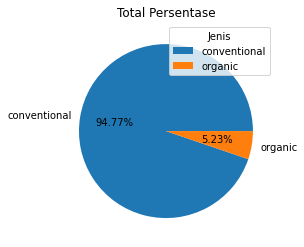

In [ ]:
persen = avocado_df[['type', 'Total Volume', 'AveragePrice']]
persenjual = persen.query('AveragePrice >= 1.4').groupby('type').mean()
plt.pie(persenjual['Total Volume'], labels=persenjual.index,autopct='%1.2f%%')
plt.title('Total Persentase')
plt.legend(title = 'Jenis')
plt.show()

It can be seen in the pie chart above that the percentage of organic avocados sold with an average price >= 1.4 is 5.23%

(d) Create a visualization to see the pattern of `AveragePrice` and `Small Bags`. Based on what you see, are there any outlier(s) for avocados with an average price of around 1.0?

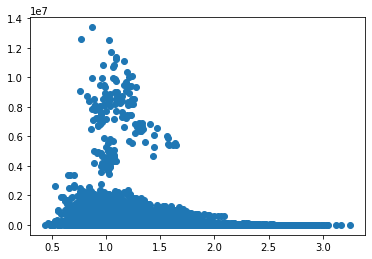

In [ ]:
avgprice = avocado_df['AveragePrice']
smallbags = avocado_df['Small Bags']
plt.scatter(avgprice, smallbags)
plt.show()

Yes, there is a value that reaches above $1 x 10^7$ for Small Bags with an average price of around 1.0.

(e) Create a visualization to see if there are any outliers in the `Total Bags` attribute for each region. Give an example of a region that appears to have no outliers.

In [ ]:
fig = px.box(avocado_df, x='region', y='Total Bags', title='Total Bags tiap Region')
fig.show()

Regions that do not have outliers are West, California, GreatLakes, etc.

(f) Look at the data distribution comparison of the number of avocados sold in California versus the GreatLakes. Provide your analysis.

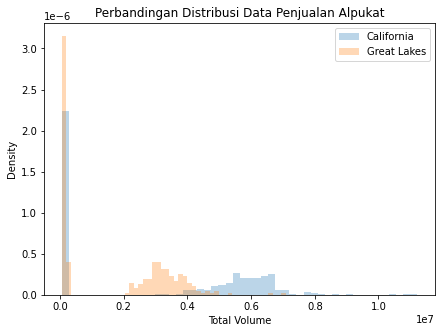

In [ ]:
california = avocado_df[avocado_df['region'] == "California"]
greatlakes = avocado_df[avocado_df['region'] == "GreatLakes"]
cal = california['Total Volume']
glk = greatlakes['Total Volume']

plt.figure(figsize=(7,5))
plt.title("Perbandingan Distribusi Data Penjualan Alpukat")
plt.hist(cal, alpha=0.3, bins=50, density=True, label="California")
plt.hist(glk, alpha=0.3, bins=50, density=True, label="Great Lakes")
plt.xlabel("Total Volume")
plt.ylabel("Density")
plt.legend()
plt.show()


In a single day, California typically sells more avocados than the GreatLakes.